In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('mushroom.csv')
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
# Task 1: Exploratory Data Analysis (EDA)
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_pr

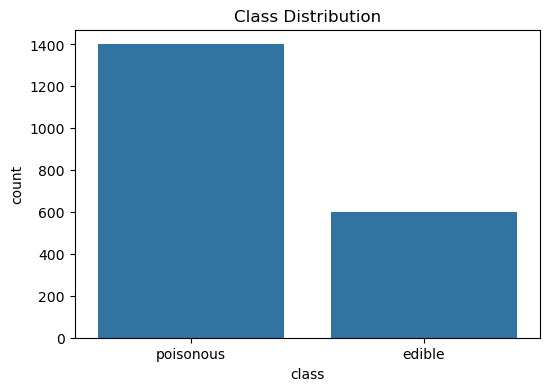

In [4]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class')  # Replace 'class' with the actual target column name if different
plt.title("Class Distribution")
plt.show()

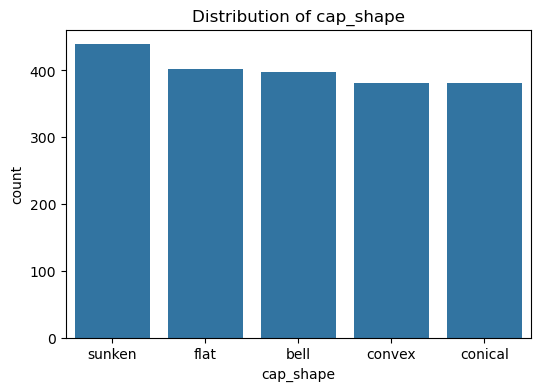

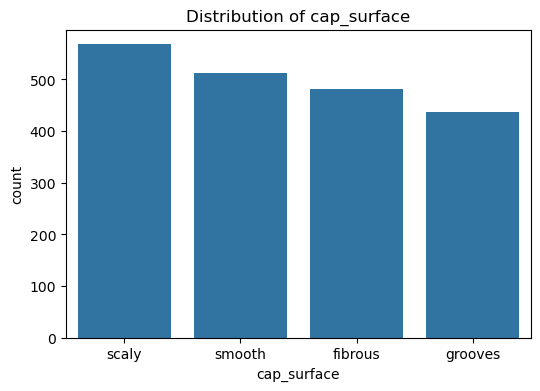

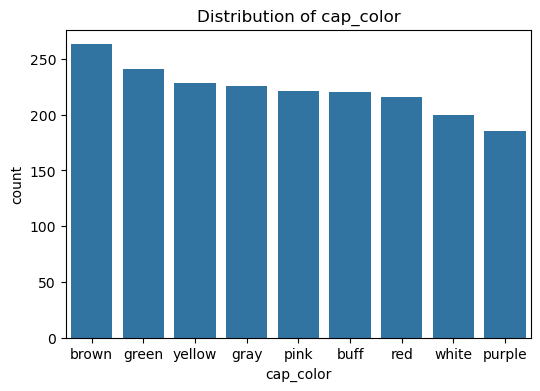

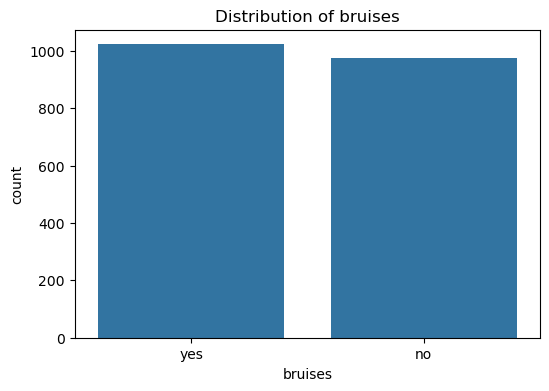

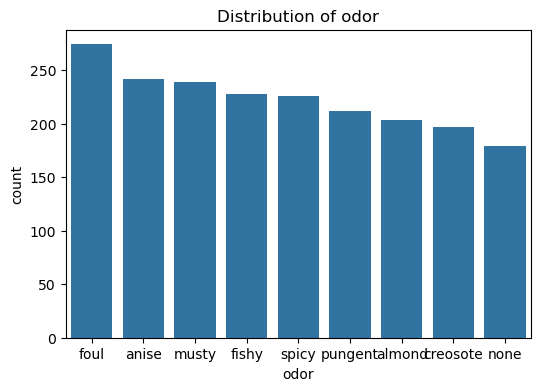

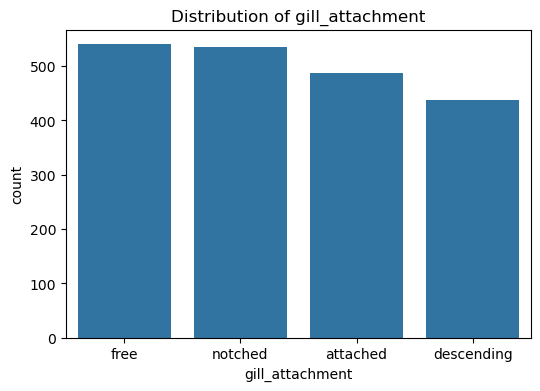

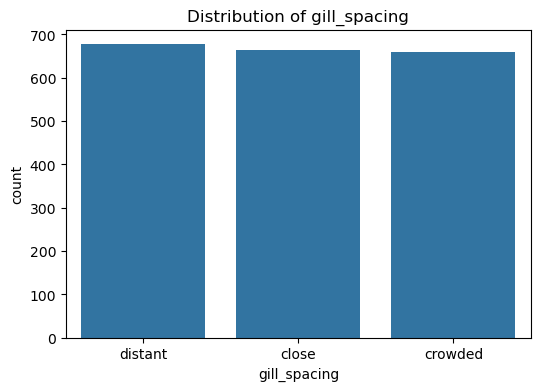

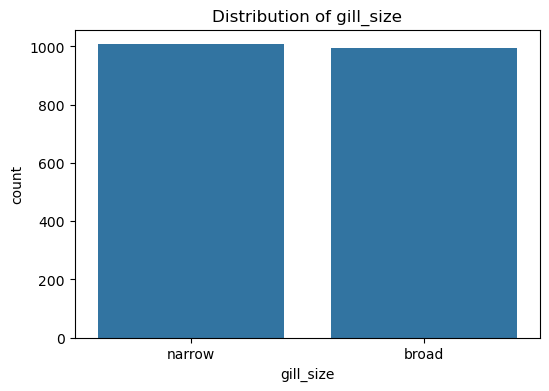

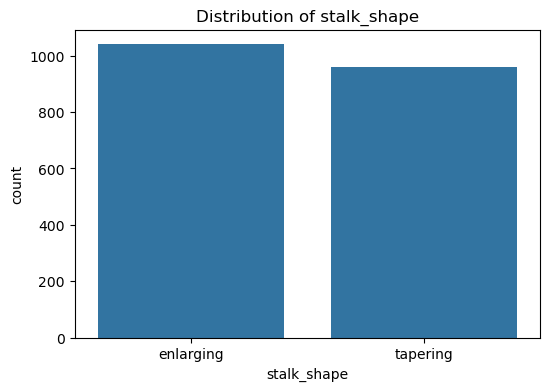

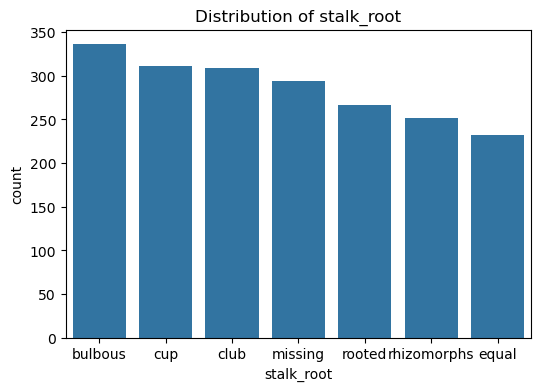

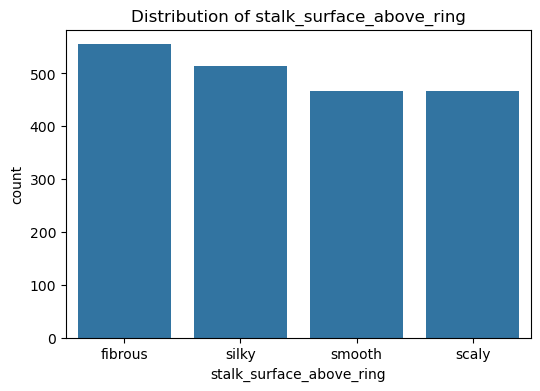

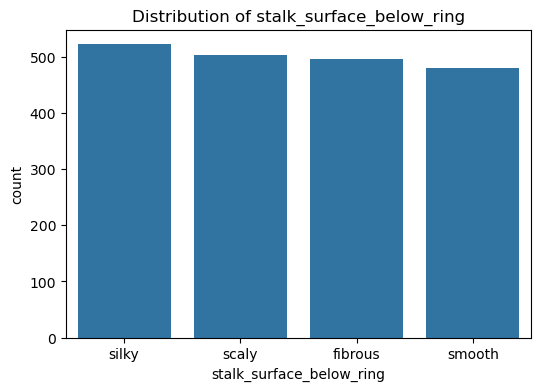

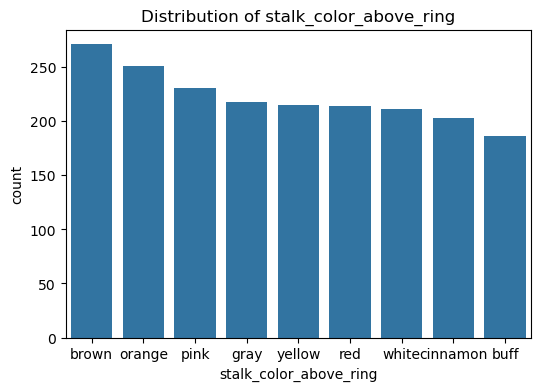

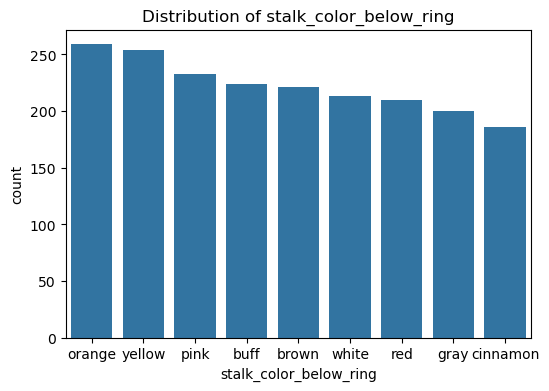

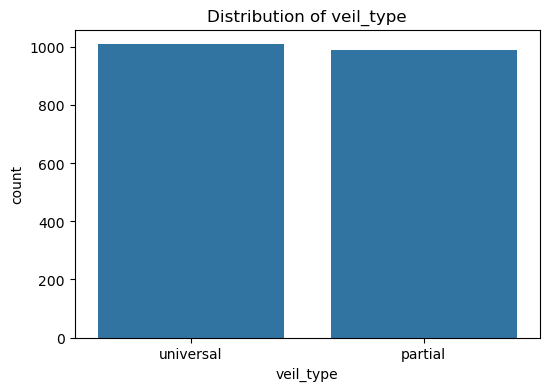

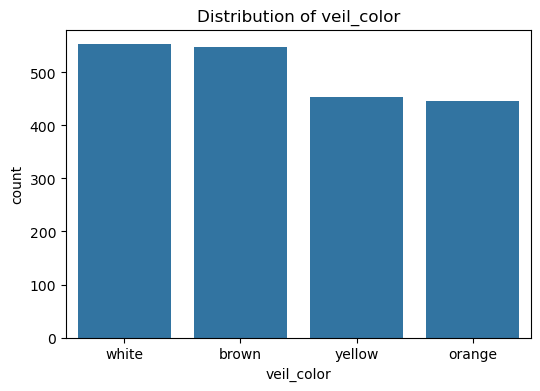

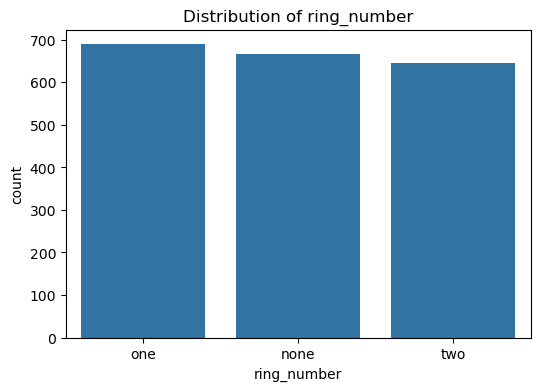

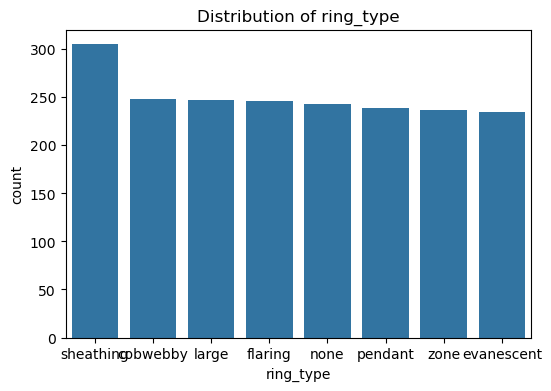

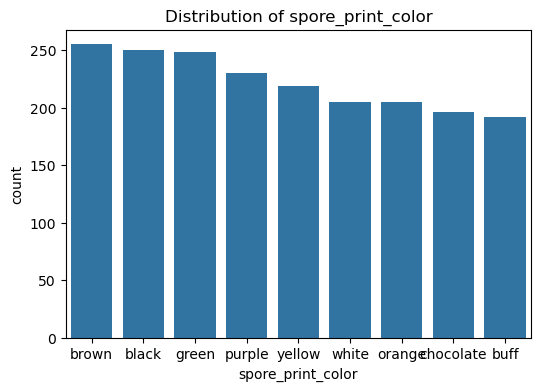

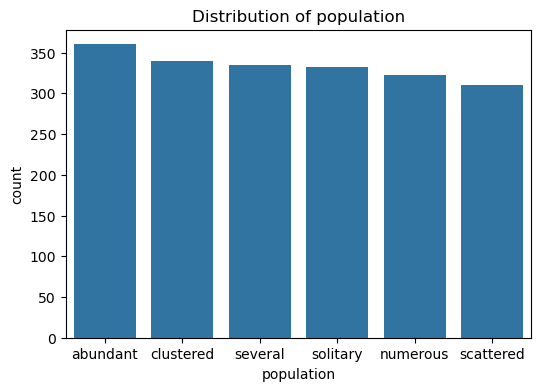

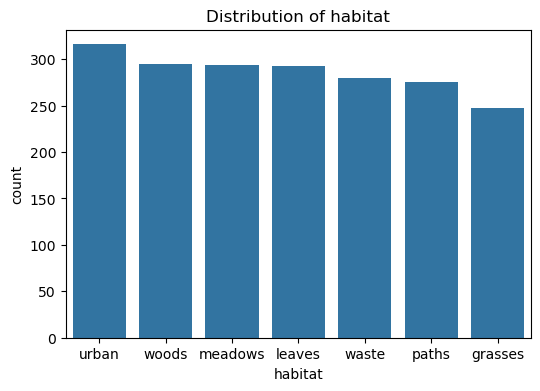

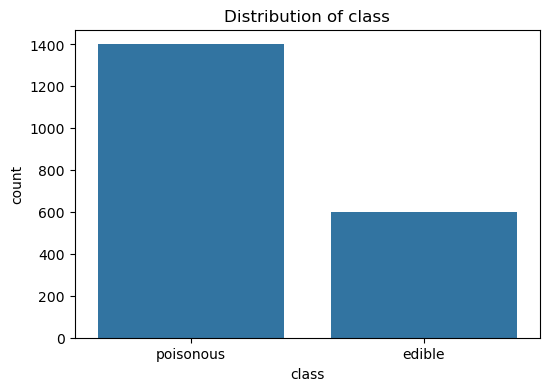

In [5]:
# Visualizing feature distributions
for col in df.columns:
    if df[col].nunique() < 10:  # For categorical features
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.show()

In [6]:
# Task 2: Data Preprocessing
# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Save the encoder for reverse mapping if needed


In [7]:
# Split dataset into features and target
X = df.drop('class', axis=1)  # Replace 'class' with your target column
y = df['class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


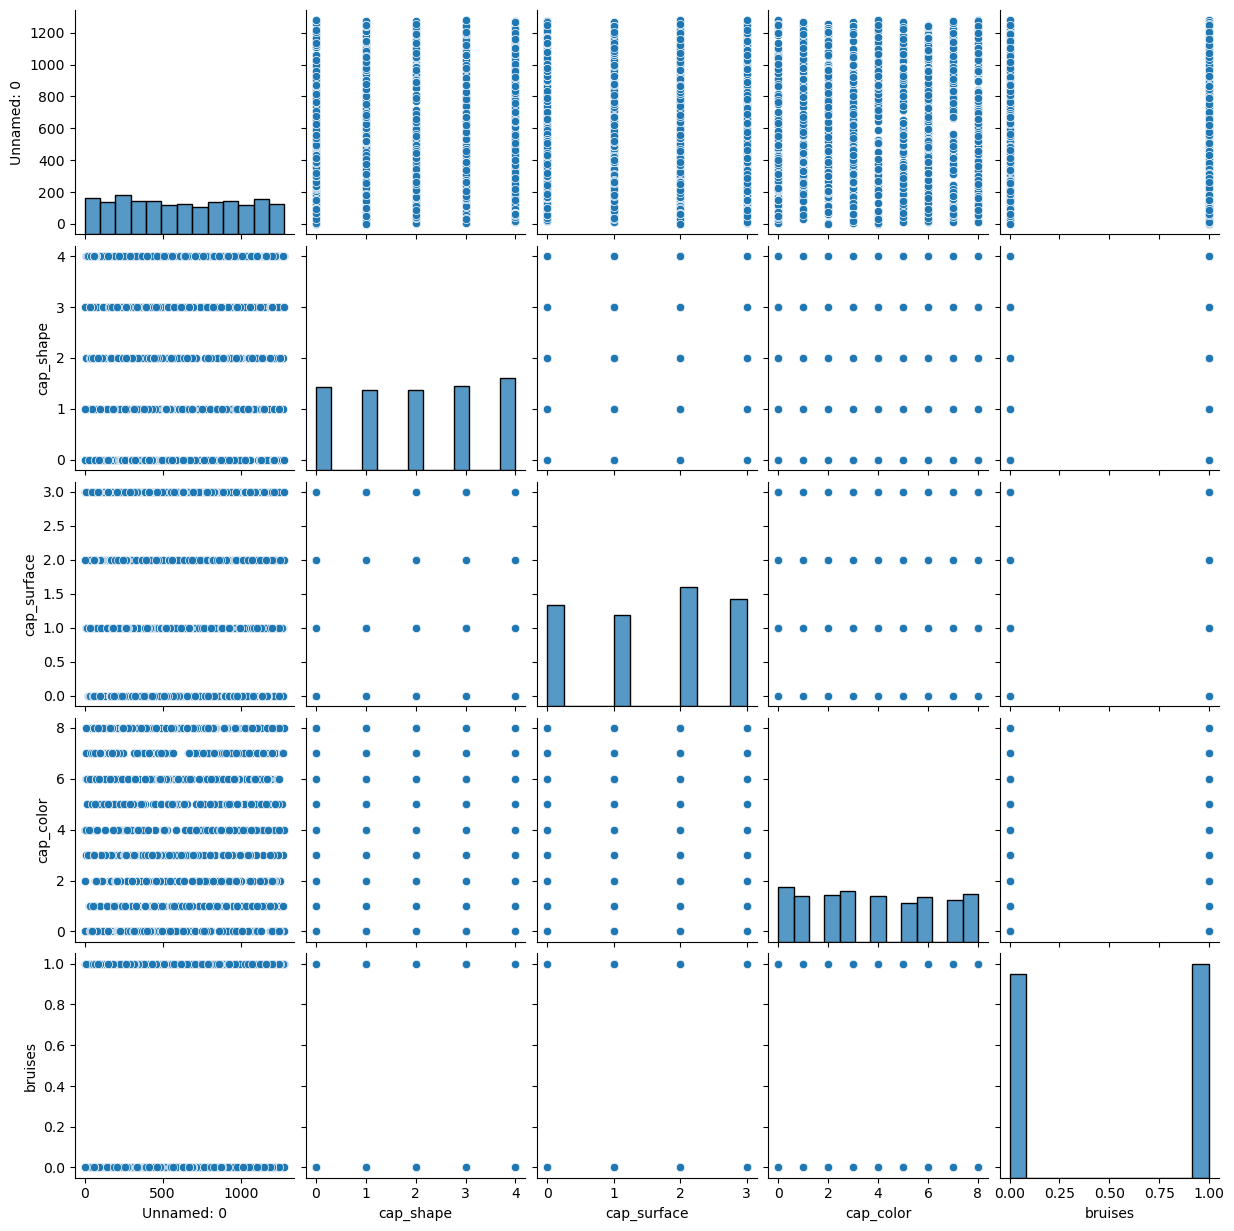

In [9]:
# Task 3: Data Visualization
# Pair plots for selected features
sns.pairplot(df.iloc[:, :5])  # Visualize only a subset of features for clarity
plt.show()


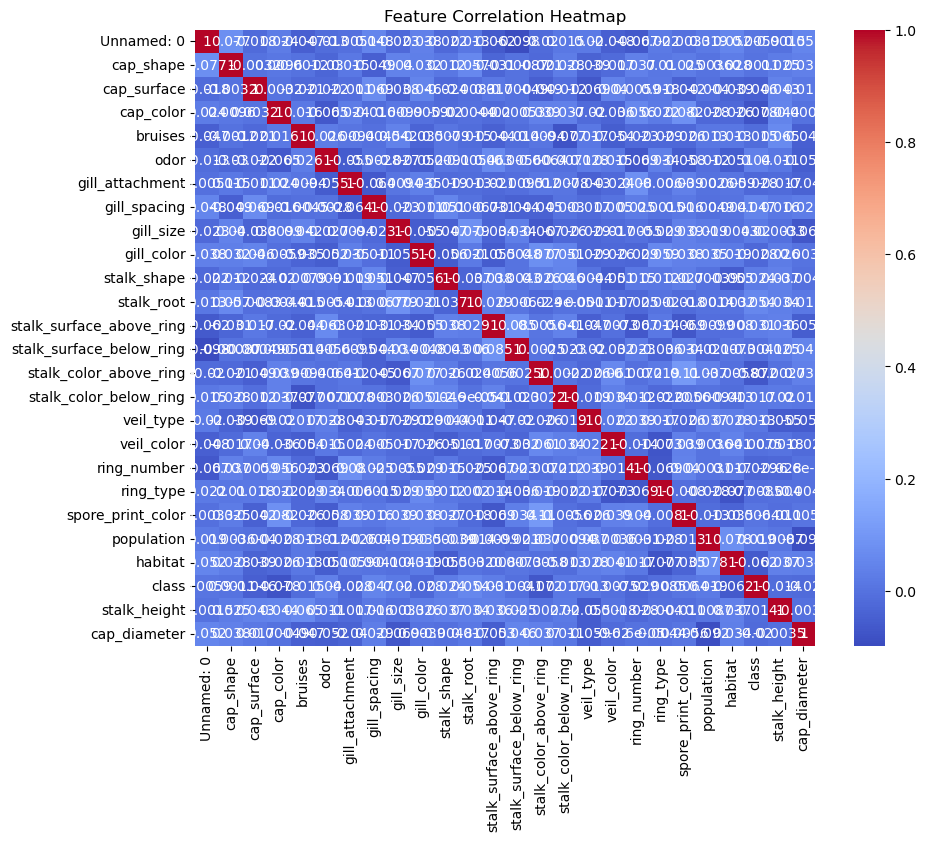

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:

# Task 4: SVM Implementation
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [12]:

# Evaluate the model
print("\nSVM Classifier Performance:")
print(classification_report(y_test, y_pred))


SVM Classifier Performance:
              precision    recall  f1-score   support

           0       0.92      0.30      0.45       120
           1       0.77      0.99      0.86       280

    accuracy                           0.78       400
   macro avg       0.85      0.64      0.66       400
weighted avg       0.81      0.78      0.74       400



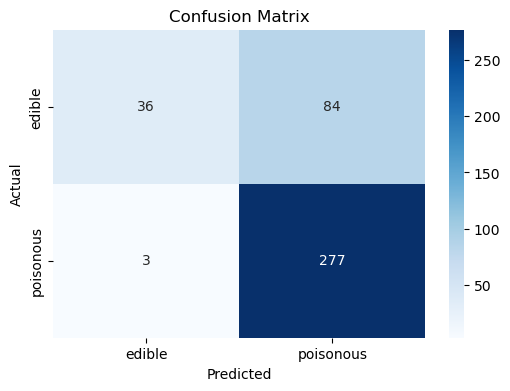

In [13]:
# Task 5: Visualization of SVM Results
# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# Task 6: Parameter Tuning and Optimization
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)

# Train and evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nOptimized SVM Classifier Performance:")
print(classification_report(y_test, y_pred_best))


Best Parameters from Grid Search:
{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

Optimized SVM Classifier Performance:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       120
           1       0.87      0.94      0.90       280

    accuracy                           0.86       400
   macro avg       0.85      0.80      0.82       400
weighted avg       0.86      0.86      0.86       400



In [15]:
# Task 7: Comparison and Analysis
results = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    model = SVC(kernel=kernel, C=1, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_pred_kernel = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_kernel)
    precision = precision_score(y_test, y_pred_kernel, average='weighted')
    recall = recall_score(y_test, y_pred_kernel, average='weighted')
    f1 = f1_score(y_test, y_pred_kernel, average='weighted')
    results.append({'Kernel': kernel, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

results_df = pd.DataFrame(results)
print("\nComparison of SVM Kernels:")
print(results_df)




C:\Users\punee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Comparison of SVM Kernels:
    Kernel  Accuracy  Precision  Recall  F1-Score
0   linear    0.7000   0.490000  0.7000  0.576471
1     poly    0.8125   0.837940  0.8125  0.784955
2      rbf    0.7825   0.814042  0.7825  0.740841
3  sigmoid    0.6750   0.484615  0.6750  0.564179


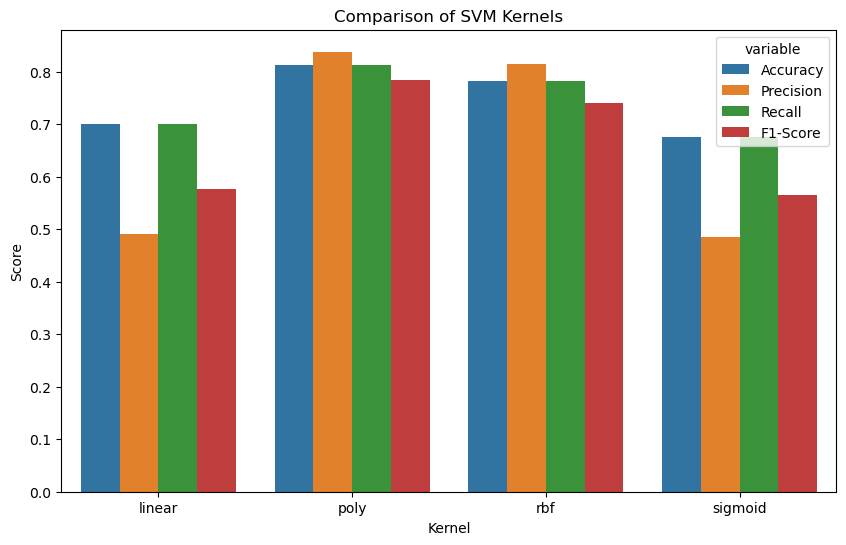

In [16]:
# Plotting Kernel Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Kernel'), x='Kernel', y='value', hue='variable')
plt.title("Comparison of SVM Kernels")
plt.ylabel("Score")
plt.show()